# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Muhammad Fajar Jati Permana]
- **Email:** [muhammad.fajarjati@gmail.com]
- **ID Dicoding:** [mfajarjati]

## Menentukan Pertanyaan Bisnis

- Apa jenis produk yang paling diminati atau sering dibeli?

- Bagaimana kinerja penjualan dan pendapatan perusahaan dalam beberapa bulan terakhir? Apakah ada tren penjualan yang signifikan atau perubahan pendapatan yang mencolok dalam rentang waktu tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import datetime as dt

## Data Wrangling

### Gathering Data

In [2]:
drive.mount('/content/drive')

orders_df = pd.read_csv('data/orders_dataset.csv')
items_df = pd.read_csv('data/order_items_dataset.csv')
products_df = pd.read_csv('data/products_dataset.csv')
payments_df = pd.read_csv('data/order_payments_dataset.csv')
reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
customers_df = pd.read_csv('data/customers_dataset.csv')
sellers_df = pd.read_csv('data/sellers_dataset.csv')
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
category_df = pd.read_csv('data/product_category_name_translation.csv')

Mounted at /content/drive


In [3]:
orders_df.head(7)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00


In [4]:
items_df.head(7)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85


In [5]:
products_df.head(7)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0


In [6]:
payments_df.head(7)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16


In [7]:
reviews_df.head(7)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34


In [8]:
customers_df.head(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP


In [9]:
sellers_df.head(7)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE


In [10]:
geolocation_df.head(7)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP


In [11]:
category_df.head(7)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery


### Assessing Data

##### data pada tabel produk

In [12]:
print('jumlah data :', len(products_df))
print('\n')
print('jumlah duplikat :', products_df.duplicated().sum())
print('\n')
print('info datatype :')
products_df.info()
print('\n')
print('jumlah Null :')
products_df.isnull().sum()

jumlah data : 32951


jumlah duplikat : 0


info datatype :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


jumlah Null :


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [13]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


##### data pada tabel order

In [14]:
print('jumlah data :', len(orders_df))
print('\n')
print('jumlah duplikat :', orders_df.duplicated().sum())
print('\n')
print('info datatype :')
orders_df.info()
print('\n')
print('jumlah Null :')
orders_df.isnull().sum()

jumlah data : 99441


jumlah duplikat : 0


info datatype :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


jumlah Null :


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


##### data pada tabel orders_item

In [16]:
print('jumlah data :', len(items_df))
print('\n')
print('jumlah duplikat :', items_df.duplicated().sum())
print('\n')
print('info datatype :')
items_df.info()
print('\n')
print('jumlah Null :')
items_df.isnull().sum()

jumlah data : 112650


jumlah duplikat : 0


info datatype :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


jumlah Null :


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [17]:
items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##### data tabel customers

In [18]:
print('jumlah data :', len(customers_df))
print('\n')
print('jumlah duplikat :', customers_df.duplicated().sum())
print('\n')
print('info datatype :')
customers_df.info()
print('\n')
print('jumlah Null :')
customers_df.isnull().sum()

jumlah data : 99441


jumlah duplikat : 0


info datatype :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


jumlah Null :


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [19]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


##### data tabel seller

In [20]:
print('jumlah data :', len(sellers_df))
print('\n')
print('jumlah duplikat :', sellers_df.duplicated().sum())
print('\n')
print('info datatype :')
sellers_df.info()
print('\n')
print('jumlah Null :')
sellers_df.isnull().sum()

jumlah data : 3095


jumlah duplikat : 0


info datatype :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


jumlah Null :


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [21]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

##### tabel produk

In [22]:
products_df.dropna(axis=0, inplace=True)

In [23]:
print('jumlah Null :')
products_df.isnull().sum()

jumlah Null :


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

##### tabel orders

In [24]:
orders_df.dropna(axis=0, inplace=True)

In [25]:
print('jumlah Null :')
orders_df.isnull().sum()

jumlah Null :


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [30]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [34]:
orders_df['order_purchase_date'] = orders_df['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')
orders_df['order_delivered_date'] = orders_df['order_delivered_customer_date'].dt.strftime('%Y-%m-%d')

orders_df['order_purchase_date'] = pd.to_datetime(orders_df.order_purchase_date)
orders_df['order_delivered_date'] = pd.to_datetime(orders_df.order_delivered_date)

# Copy DataFrame to a new DataFrame
new_order_df = orders_df.copy()

# Extracting year and month from the order purchase date
new_order_df['order_date_year'] = new_order_df['order_purchase_date'].dt.year
new_order_df['order_date_month'] = new_order_df['order_purchase_date'].dt.strftime('%B')
new_order_df['month-year'] = new_order_df['order_purchase_date'].dt.strftime('%B-%Y')

# Extracting day of the week from the order purchase date
new_order_df['order_date_day'] = new_order_df['order_purchase_date'].dt.day_name()

# Displaying the first 6 rows of the updated DataFrame
display(new_order_df.head(7))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_date,order_delivered_date,order_date_year,order_date_month,month-year,order_date_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-02,2017-10-10,2017,October,October-2017,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-24,2018-08-07,2018,July,July-2018,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-08,2018-08-17,2018,August,August-2018,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-18,2017-12-02,2017,November,November-2017,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-13,2018-02-16,2018,February,February-2018,Tuesday
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,2017-07-09,2017-07-26,2017,July,July-2017,Sunday
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,2017-05-16,2017-05-26,2017,May,May-2017,Tuesday


In [27]:
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'])

columns = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
orders_df[columns] = orders_df[columns].apply(pd.to_datetime)

items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [35]:
new_order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
 8   order_purchase_date            96461 non-null  datetime64[ns]
 9   order_delivered_date           96461 non-null  datetime64[ns]
 10  order_date_year                96461 non-null  int64         
 11  order_date_mont

In [36]:
# Menggabungkan tabel secara berurutan menggunakan metode merge() secara bertahap
ecommerce_df = new_order_df.merge(customers_df, on='customer_id') \
                          .merge(payments_df, on='order_id') \
                          .merge(items_df, on='order_id') \
                          .merge(products_df, on='product_id').copy()

In [37]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113390 entries, 0 to 113389
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113390 non-null  object        
 1   customer_id                    113390 non-null  object        
 2   order_status                   113390 non-null  object        
 3   order_purchase_timestamp       113390 non-null  datetime64[ns]
 4   order_approved_at              113390 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113390 non-null  datetime64[ns]
 6   order_delivered_customer_date  113390 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113390 non-null  datetime64[ns]
 8   order_purchase_date            113390 non-null  datetime64[ns]
 9   order_delivered_date           113390 non-null  datetime64[ns]
 10  order_date_year                113390 non-null  int64         
 11  

In [38]:
ecommerce_df.to_csv("all_data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore top produk tertinggi (pertanyaan 1)

In [39]:
product_join_item = products_df.merge(items_df, on='product_id', how='inner')

top_kategori = product_join_item['product_category_name'].value_counts().head(7)
top_kategori

cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
Name: product_category_name, dtype: int64

### Explore pendapatan per-bulannya (pertanyaan 2)

In [40]:
pendapatan_tahunan = ecommerce_df.groupby('order_date_year')['payment_value'].sum().sort_values(ascending=False)
pendapatan_tahunan

order_date_year
2018    10739637.46
2017     8728350.53
2016       62515.35
Name: payment_value, dtype: float64

In [41]:
# Check total income of the store per year
pendapatan_bulanan = (
    ecommerce_df.groupby('order_date_month')
    .agg(grand_total=('payment_value', 'sum'))
    .sort_values(by='order_date_month', ascending=True)
)
pendapatan_bulanan

,grand_total
order_date_month,
April,1900758.17
August,2043280.80
December,1001855.22
February,1575812.28
January,1515119.14
July,2011350.57
June,1860048.09
March,1909009.16
May,2162395.43


In [42]:
group_columns = ['order_date_year', 'order_date_month', 'month-year']
pendapatan_tahunan_bulanan = ecommerce_df.groupby(group_columns)['order_id'].nunique().reset_index()
pendapatan_tahunan_bulanan

pendapatan_tahunan_bulanan

,order_date_year,order_date_month,month-year,order_id
0,2016,December,December-2016,1
1,2016,October,October-2016,268
2,2017,April,April-2017,2243
3,2017,August,August-2017,4129
4,2017,December,December-2017,5383
5,2017,February,February-2017,1592
6,2017,January,January-2017,737
7,2017,July,July-2017,3824
8,2017,June,June-2017,3085
9,2017,March,March-2017,2496


## Visualization & Explanatory Analysis

### Pertanyaan 1:

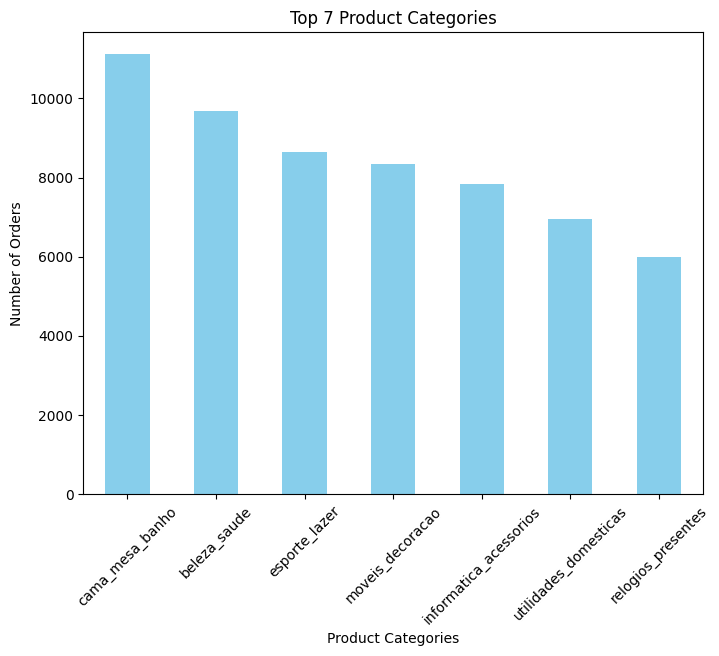

In [43]:
top_kategori.plot.bar(color='skyblue', figsize=(8, 6))
plt.title('Top 7 Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

In [44]:
pendapatan__2017_tahunan_bulanan = pendapatan_tahunan_bulanan[pendapatan_tahunan_bulanan['order_date_year'] == 2017]
pendapatan_2018_tahunan_bulanan = pendapatan_tahunan_bulanan[pendapatan_tahunan_bulanan['order_date_year'] == 2018]

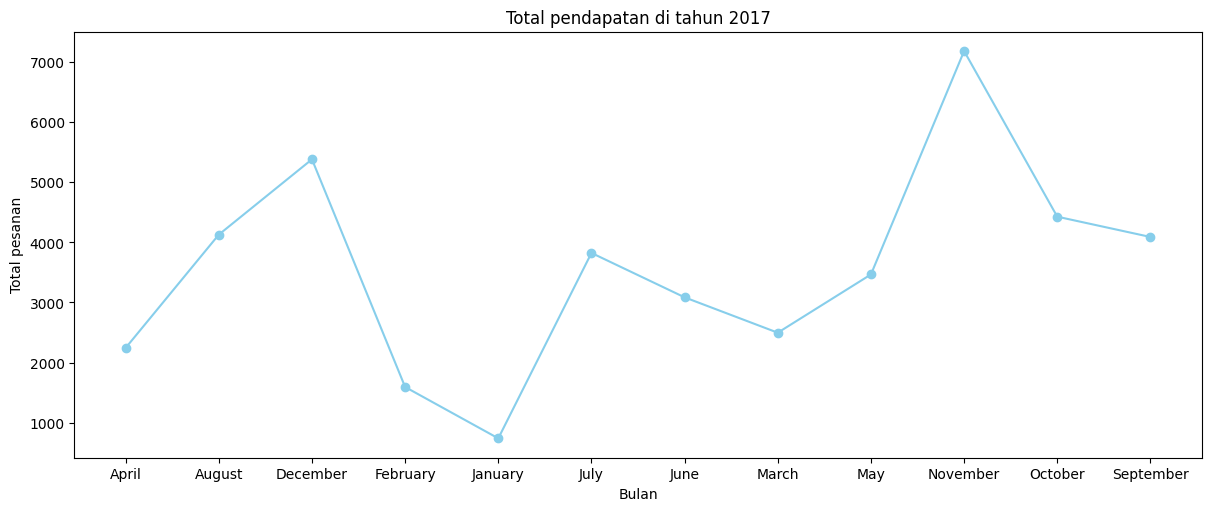

In [45]:
plt.figure(constrained_layout=True, figsize=(12, 5))

plt.plot(pendapatan__2017_tahunan_bulanan['order_date_month'], pendapatan__2017_tahunan_bulanan['order_id'], color='skyblue', marker='o')
plt.xticks(pendapatan__2017_tahunan_bulanan['order_date_month'])

plt.title('Total pendapatan di tahun 2017')
plt.ylabel('Total pesanan')
plt.xlabel('Bulan')

plt.show()

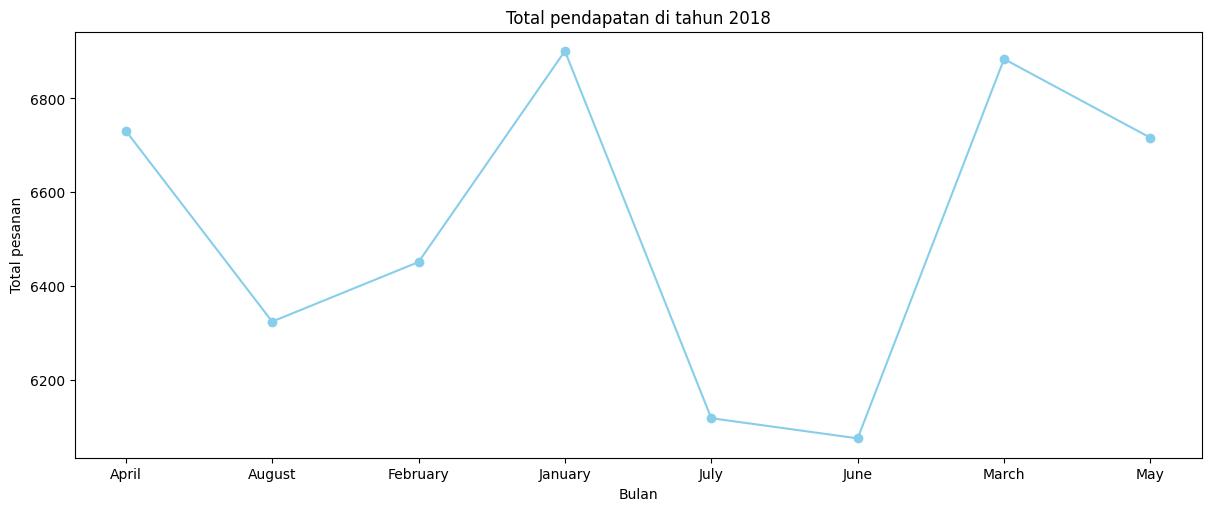

In [46]:
plt.figure(constrained_layout=True, figsize=(12, 5))

plt.plot(pendapatan_2018_tahunan_bulanan['order_date_month'], pendapatan_2018_tahunan_bulanan['order_id'], color='skyblue', marker='o')
plt.xticks(pendapatan_2018_tahunan_bulanan['order_date_month'])

plt.title('Total pendapatan di tahun 2018')
plt.ylabel('Total pesanan')
plt.xlabel('Bulan')

plt.show()

## Conclusion

- Conclution pertanyaan 1 : 7 kategori produk paling sering di beli adalah cama_mesa_banho lalu kedua yaitu beleza_saude, ketiga yaitu esporte_lazer, selanjutnya yaitu moveis_decoracao, serta informatica_acessorios, utilidades_domesticas, dan terakhir relogios_presentes.

- Conclution pertanyaan 2 : berdasarkan data serta chart yang terlihat, jumlah total pesanan pada tahun 2018 mengalami penurunan yang cukup signifikan namun masih tetap ada kenaikan yang signifikan juga di penghujung tahun.Total pesanan terendah terjadi pada bulan Juni dan kenaikan tertinggi terjadi pada bulan januari. Untuk jumlah total pesanan pada tahun 2017 mengalami meningkatan walaupun sempat mengalami penurunan namun peningkatannya tetap konsisten dan signifikan.Total pesanan terendah terjadi pada bulan Januari dan kenaikan tertinggi terjadi pada bulan november.